In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('1-studyhours.csv')

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


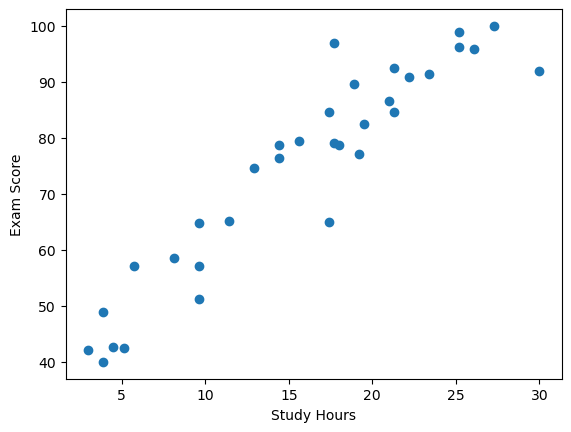

In [6]:
plt.scatter(df['Study Hours'], df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

In [7]:
# independent and dependent features. girdiyi yani X i frame olarak , çıktıyı da yani y yi series olarak vermemiz beklenir
X = df[['Study Hours']]
y = df['Exam Score']


In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [10]:
# test - train split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=15)
# test_size %20, X ve y yi ikiye bölüyor  traiin e %80 i kaydediyor test e %20 yi kaydediyor

In [13]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [14]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [15]:
#standardize the data set

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [18]:
#balanced feature valeus
# efficient gradient descent
#l1, l2

In [19]:
scaler = StandardScaler()

In [20]:
X

,Study Hours
0,3.9
1,9.6
2,4.5
3,11.4
4,14.4
5,18.0
6,19.2
7,22.2
8,25.2
9,17.4


In [21]:
X_train = scaler.fit_transform(X_train) # burda fit transform ortalama ve standart sapamyı heaspalyıp şu formülde kullanır X-(ortalama)/(standart sapma)
X_test = scaler.transform(X_test )# fit -> data leakage

In [22]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [23]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train,y_train) # fit eğitimi kullanmak için, predict geleceği tahmin etmek için

LinearRegression()

In [27]:
print("Coefficient:",regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient: [16.17860223]
Intercept: 76.9076923076923


In [28]:
# y = 76.91 + 16.18x

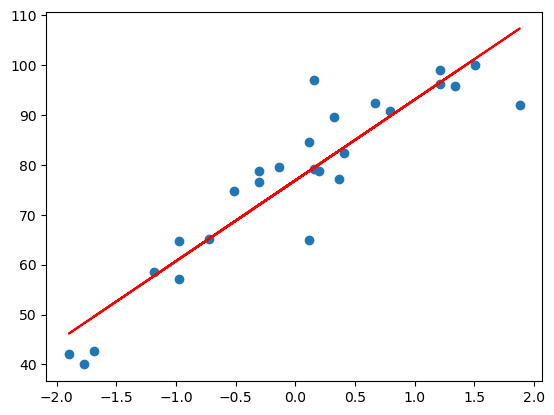

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')
plt.show()

In [30]:
# c = 20, y=?

In [31]:
regression.predict([[20]]) 
#direkt 20 değerini verdiğimizde büüyk sonuç çıkıyor

array([400.47973694])

In [32]:
scaler.transform([[20]])
# 20 yi standart scaler ile vermemiz gerekiyor

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [33]:
regression.predict(scaler.transform([[20]]))
# 20 saat çalışan biri sınavdan 84 alır diyor model

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [34]:
regression.predict(scaler.transform([[10]]))


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])

In [35]:
#prediction with test data

In [37]:
y_pred_test = regression.predict(X_test)

In [38]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

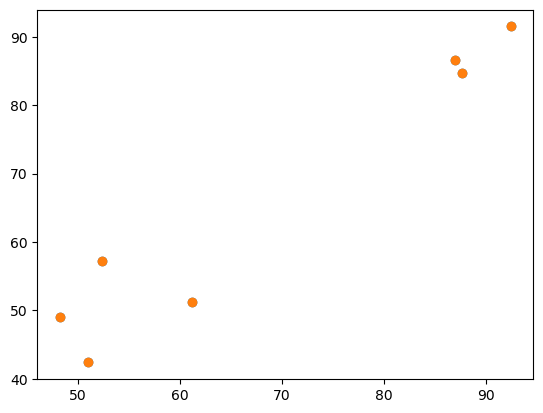

In [40]:
plt.scatter(y_pred_test,y_test)
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [44]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)

mse: 29.45839048833392
mae: 4.054868128856142
rmse: 5.427558427906043


In [45]:
r2 = r2_score(y_test,y_pred_test)
print("re score:",r2)

re score: 0.9196596206825491


In [46]:
#adjusted r2 score
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.903591544819059